In [1]:
import os 
import pandas as pd
import numpy as np
# Import matplotlib to visualize the model
import matplotlib.pyplot as plt
# Seaborn is a Python data visualization library based on matplotlib
import seaborn as sns
%matplotlib inline   
import missingno as msno

# New Section

In [2]:
df = pd.read_csv('/content/germany_housing_data.csv')

Inspect the Data

In [3]:
# Get a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10552 entries, 0 to 10551
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10552 non-null  int64  
 1   Price                    10552 non-null  float64
 2   Type                     10150 non-null  object 
 3   Living_space             10552 non-null  float64
 4   Lot                      10552 non-null  float64
 5   Usable_area              5568 non-null   float64
 6   Free_of_Relation         6983 non-null   object 
 7   Rooms                    10552 non-null  float64
 8   Bedrooms                 6878 non-null   float64
 9   Bathrooms                8751 non-null   float64
 10  Floors                   7888 non-null   float64
 11  Year_built               9858 non-null   float64
 12  Furnishing_quality       7826 non-null   object 
 13  Year_renovated           5349 non-null   float64
 14  Condition             

In [4]:
# round to two decimal places in python pandas
pd.options.display.float_format = '{:.2f}'.format

In [5]:
# We can use .describe() to see some summary statistics for the numeric fields in our dataframe.
df.describe()

,Unnamed: 0,Price,Living_space,Lot,Usable_area,Rooms,Bedrooms,Bathrooms,Floors,Year_built,Year_renovated,Energy_consumption,Garages
count,10552.00,10552.00,10552.00,10552.00,5568.00,10552.00,6878.00,8751.00,7888.00,9858.00,5349.00,2433.00,8592.00
mean,5275.50,556685.09,216.72,1491.66,134.30,7.39,4.17,2.31,2.28,1958.82,2010.71,117.66,2.70
std,3046.24,608741.00,172.42,8582.36,188.81,5.38,2.58,1.74,0.82,55.96,10.55,54.02,3.20
min,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1300.00,1900.00,5.10,1.00
25%,2637.75,250000.00,130.00,370.00,48.00,5.00,3.00,1.00,2.00,1935.00,2006.00,83.17,1.00
50%,5275.50,405215.00,176.78,656.50,80.00,6.00,4.00,2.00,2.00,1971.00,2015.00,112.70,2.00
75%,7913.25,655000.00,250.00,1047.00,150.25,8.00,5.00,3.00,3.00,1996.00,2018.00,146.00,3.00
max,10551.00,13000000.00,5600.00,547087.00,4034.00,170.00,61.00,44.00,13.00,2022.00,2206.00,503.94,70.00


In [6]:
print ("Rows     : " ,df.shape[0])
print ("Columns  : " ,df.shape[1])
print ("\nFeatures : \n" ,df.columns.tolist())
print ("\nMissing values :  ", df.isnull().sum().values.sum())
print ("\nUnique values :  \n",df.nunique())

Rows     :  10552
Columns  :  26

Features : 
 ['Unnamed: 0', 'Price', 'Type', 'Living_space', 'Lot', 'Usable_area', 'Free_of_Relation', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors', 'Year_built', 'Furnishing_quality', 'Year_renovated', 'Condition', 'Heating', 'Energy_source', 'Energy_certificate', 'Energy_certificate_type', 'Energy_consumption', 'Energy_efficiency_class', 'State', 'City', 'Place', 'Garages', 'Garagetype']

Missing values :   49282

Unique values :  
 Unnamed: 0                 10552
Price                       1411
Type                          11
Living_space                1867
Lot                         2526
Usable_area                 1012
Free_of_Relation             705
Rooms                         72
Bedrooms                      32
Bathrooms                     28
Floors                        10
Year_built                   292
Furnishing_quality             4
Year_renovated                67
Condition                     10
Heating                       13
E

In [7]:
# `isnull()` finds a null value in a column and `sum()` counts it
df.isnull().sum()

Unnamed: 0                    0
Price                         0
Type                        402
Living_space                  0
Lot                           0
Usable_area                4984
Free_of_Relation           3569
Rooms                         0
Bedrooms                   3674
Bathrooms                  1801
Floors                     2664
Year_built                  694
Furnishing_quality         2726
Year_renovated             5203
Condition                   323
Heating                     584
Energy_source              1227
Energy_certificate          755
Energy_certificate_type    3526
Energy_consumption         8119
Energy_efficiency_class    4819
State                         1
City                          1
Place                       290
Garages                    1960
Garagetype                 1960
dtype: int64

In [8]:
vals = [df.columns]
list = []
for i in vals:
    count = ((df[i]==' ').sum())
    list.append(count)

print(vals,':',list)

[Index(['Unnamed: 0', 'Price', 'Type', 'Living_space', 'Lot', 'Usable_area',
       'Free_of_Relation', 'Rooms', 'Bedrooms', 'Bathrooms', 'Floors',
       'Year_built', 'Furnishing_quality', 'Year_renovated', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'State', 'City', 'Place', 'Garages',
       'Garagetype'],
      dtype='object')] : [Unnamed: 0                 0
Price                      0
Type                       0
Living_space               0
Lot                        0
Usable_area                0
Free_of_Relation           2
Rooms                      0
Bedrooms                   0
Bathrooms                  0
Floors                     0
Year_built                 0
Furnishing_quality         0
Year_renovated             0
Condition                  0
Heating                    0
Energy_source              0
Energy_certificate         0
Energy_certificate_type 

In [9]:
df['Year_built'] =  pd.to_datetime(df['Year_built'],
                              format='%Y-%m-%d').dt.date
df['Year_renovated'] =  pd.to_datetime(df['Year_renovated'],
                              format='%Y-%m-%d').dt.date

In [10]:
# Specifying numeric variables and correcting their types
numeric = ['Price', 'Living_space', 'Lot', 'Usable_area',
        'Rooms', 'Bedrooms', 'Bathrooms', 'Floors',
                'Garages',]
for col in numeric: 
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Specifying categorical variables and correcting their types
categorical = ['Type',
       'Furnishing_quality', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'Garagetype']
for col in categorical: 
    df[col] = df[col].astype(object)

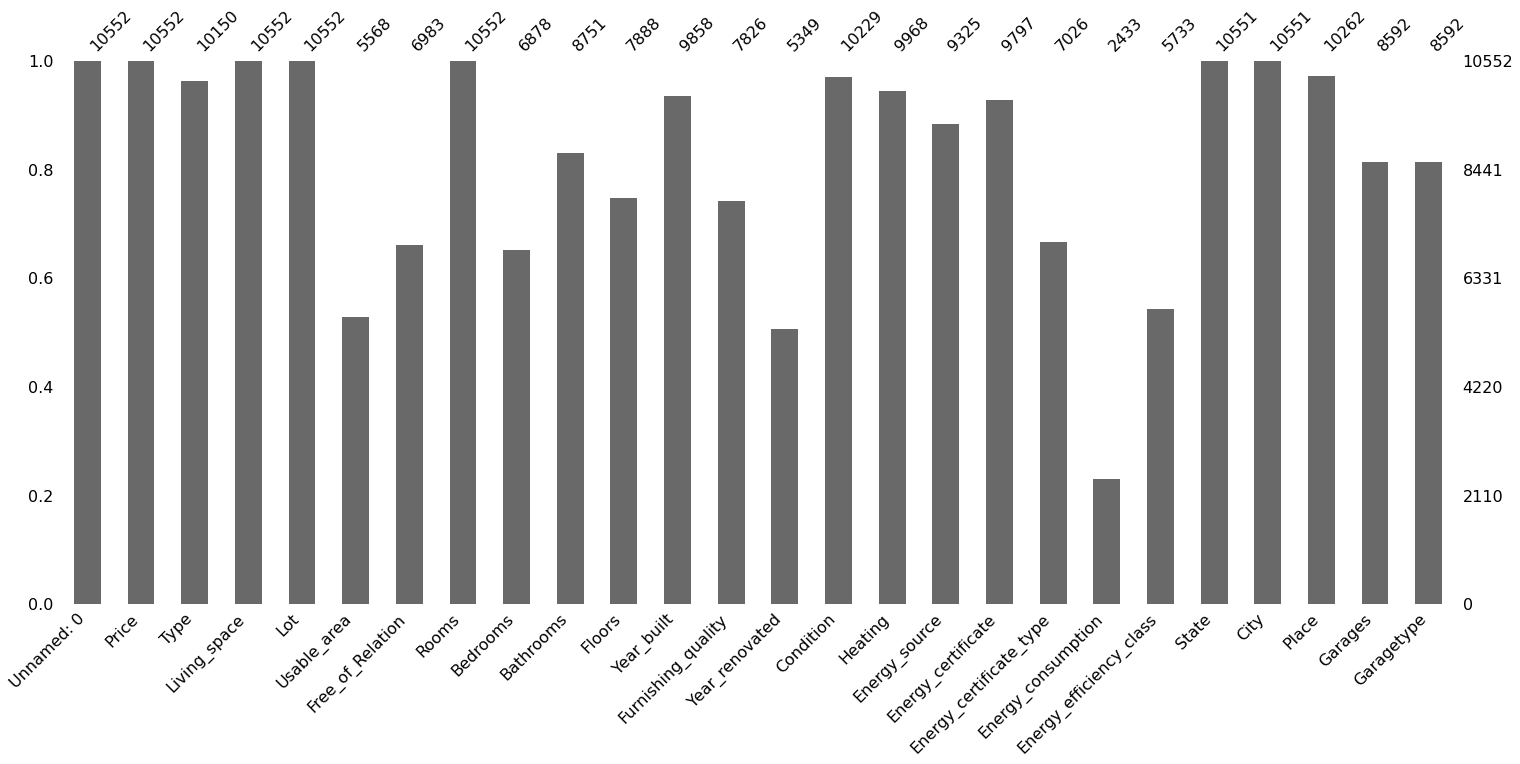

In [11]:
msno.bar(df)

In [12]:
categorical = ['Type',
       'Furnishing_quality', 'Condition',
       'Heating', 'Energy_source', 'Energy_certificate',
       'Energy_certificate_type', 'Energy_consumption',
       'Energy_efficiency_class', 'Garagetype']
for col in categorical: 
    df[col] =  df[col].fillna('U')
    #df[col] =  df[col].dropna()


In [13]:
numeric = ['Price', 'Living_space', 'Lot','Rooms', 'Bedrooms', 'Bathrooms', 'Floors','Garages']
for col in numeric: 
    df[col] = df[col].replace(np.nan, df[col].mean())
    #df[col] = df[col].replace(np.nan, df[col].dropna())

In [14]:
df['Year_built'] =  df['Year_built'].dropna()

In [15]:
#removing unwanted variables
del df['Unnamed: 0']
del df['State']
del df['Free_of_Relation']
del df['Place']
del df['Usable_area']
del df['Energy_consumption']
del df['Year_renovated']

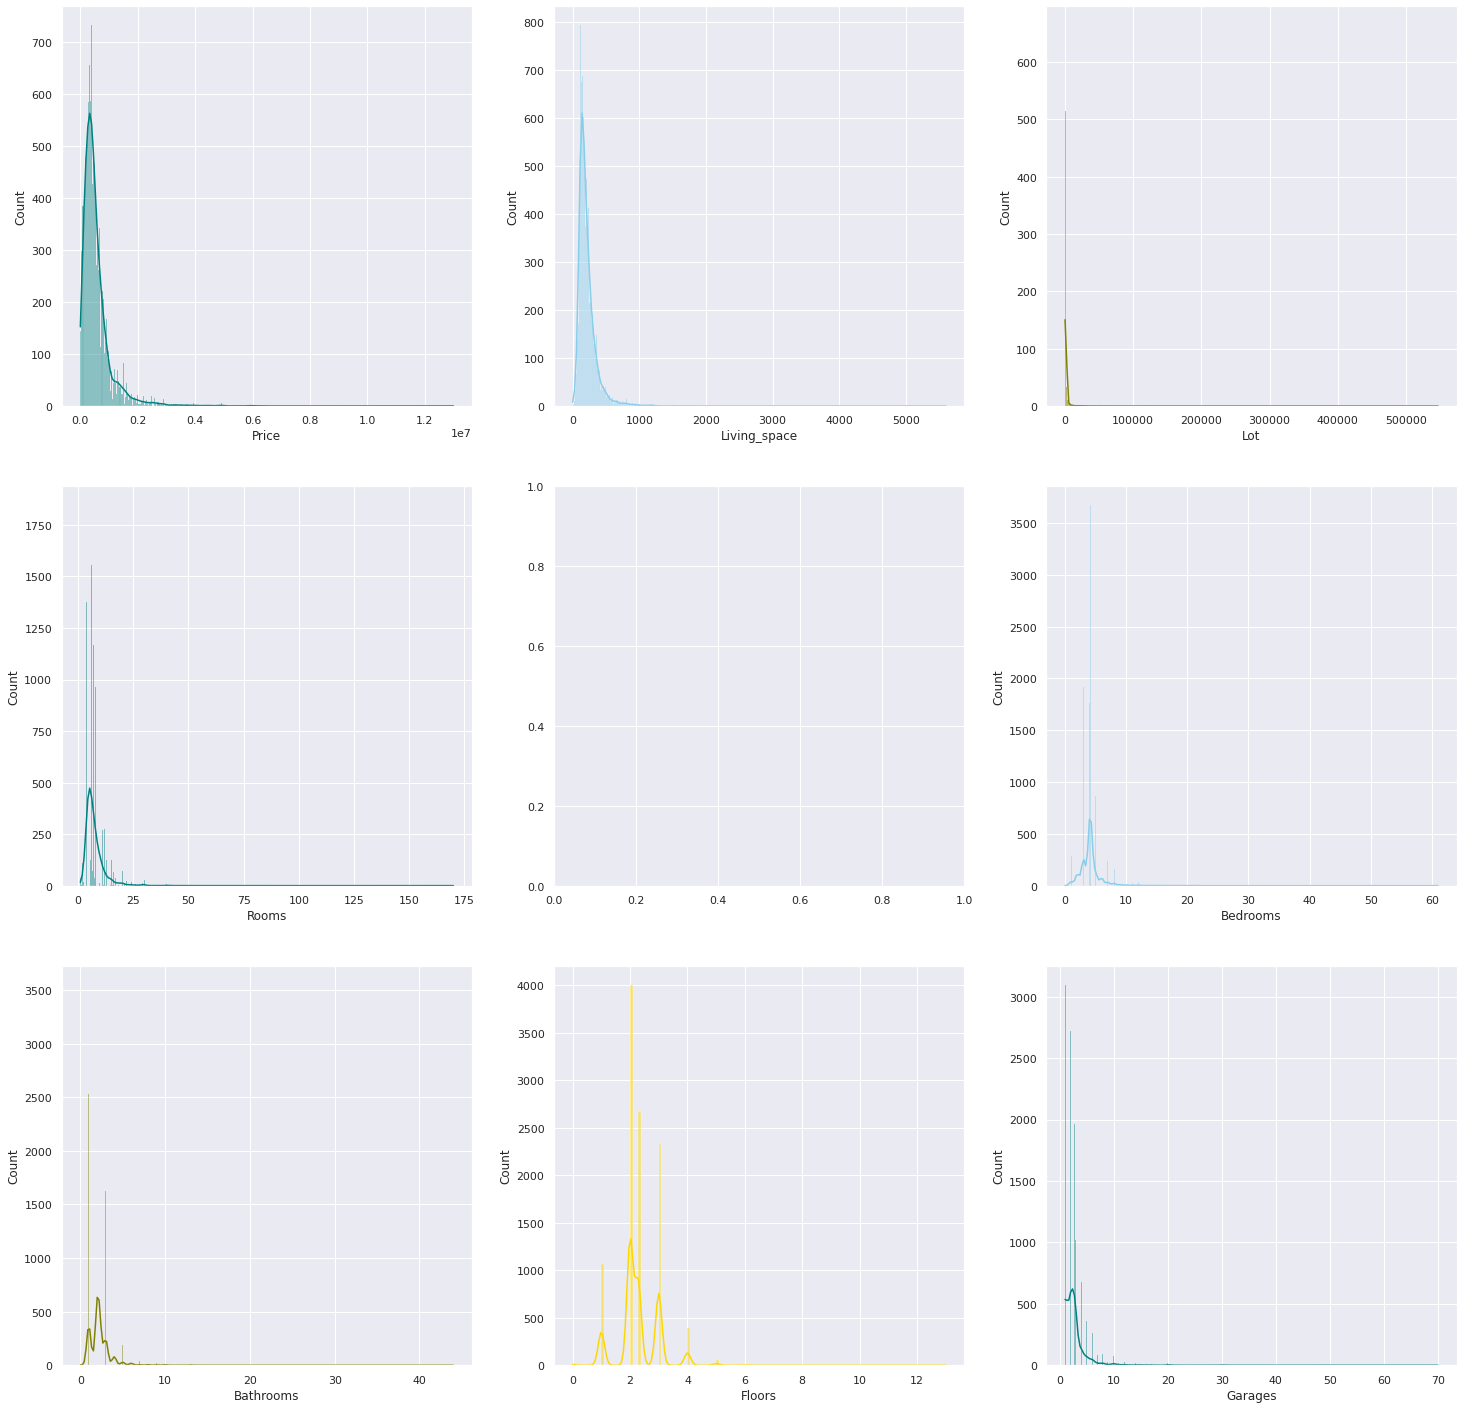

In [25]:
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(25, 25))

sns.histplot(data=df, x="Price", kde=True, color="teal", ax=axs[0, 0])
sns.histplot(data=df, x="Living_space", kde=True, color="skyblue", ax=axs[0, 1])
sns.histplot(data=df, x="Lot", kde=True, color="olive", ax=axs[0, 2])
#sns.histplot(data=df, x="Usable_area", kde=True, color="gold", ax=axs[1, 1])
sns.histplot(data=df, x="Rooms", kde=True, color="teal", ax=axs[1, 0])
sns.histplot(data=df, x="Bedrooms", kde=True, color="skyblue", ax=axs[1, 2])
sns.histplot(data=df, x="Bathrooms", kde=True, color="olive", ax=axs[2, 0])
sns.histplot(data=df, x="Floors", kde=True, color="gold", ax=axs[2, 1])
sns.histplot(data=df, x="Garages", kde=True, color="teal", ax=axs[2, 2])

plt.show()   